## Regression with a decision tree

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import graphviz 

from sklearn import tree, datasets, metrics, model_selection

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
boston = datasets.load_boston()
#Boston house prices dataset
#print(boston.DESCR)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

print('train samples:', len(X_train))
print('test samples', len(X_test))

train samples: 354
test samples 152


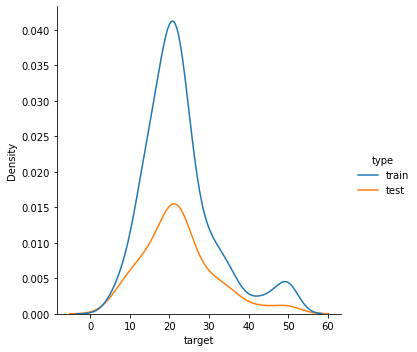

In [ ]:
df_train = pd.DataFrame(y_train, columns=['target'])
df_train['type'] = 'train'

df_test = pd.DataFrame(y_test, columns=['target'])
df_test['type'] = 'test'

df_set = df_train.append(df_test, ignore_index=True)

_ = sns.displot(df_set, x="target" ,hue="type", kind="kde", log_scale=False)

In [ ]:
model = tree.DecisionTreeRegressor(max_depth=4, criterion='squared_error', splitter='best', min_samples_split=2, min_samples_leaf=1, min_impurity_decrease=0.0)
# Hiperparametros:
# criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
# splitter = ['best', 'random']
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
predicted = model.predict(X_test)

print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

r2 score: 0.7202801941861116
mse: 24.755181506233672
rmse: 4.9754579192506165


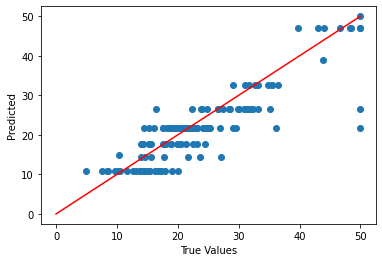

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')
_ = ax.plot([0, y.max()], [0, y.max()], ls='-', color='red')

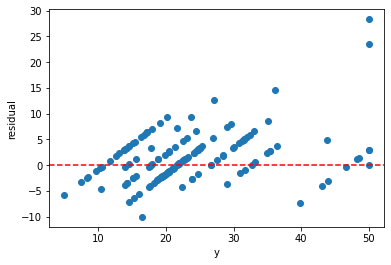

In [ ]:
residual = y_test - predicted

fig, ax = plt.subplots()
ax.scatter(y_test, residual)
ax.set_xlabel('y')
ax.set_ylabel('residual')

_ = plt.axhline(0, color='red', ls='--')

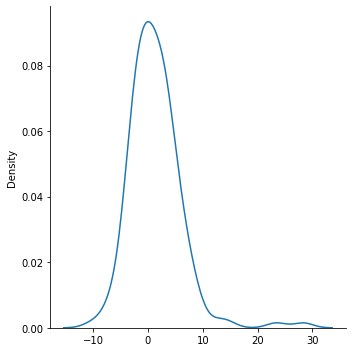

In [ ]:
sns.displot(residual, kind="kde");

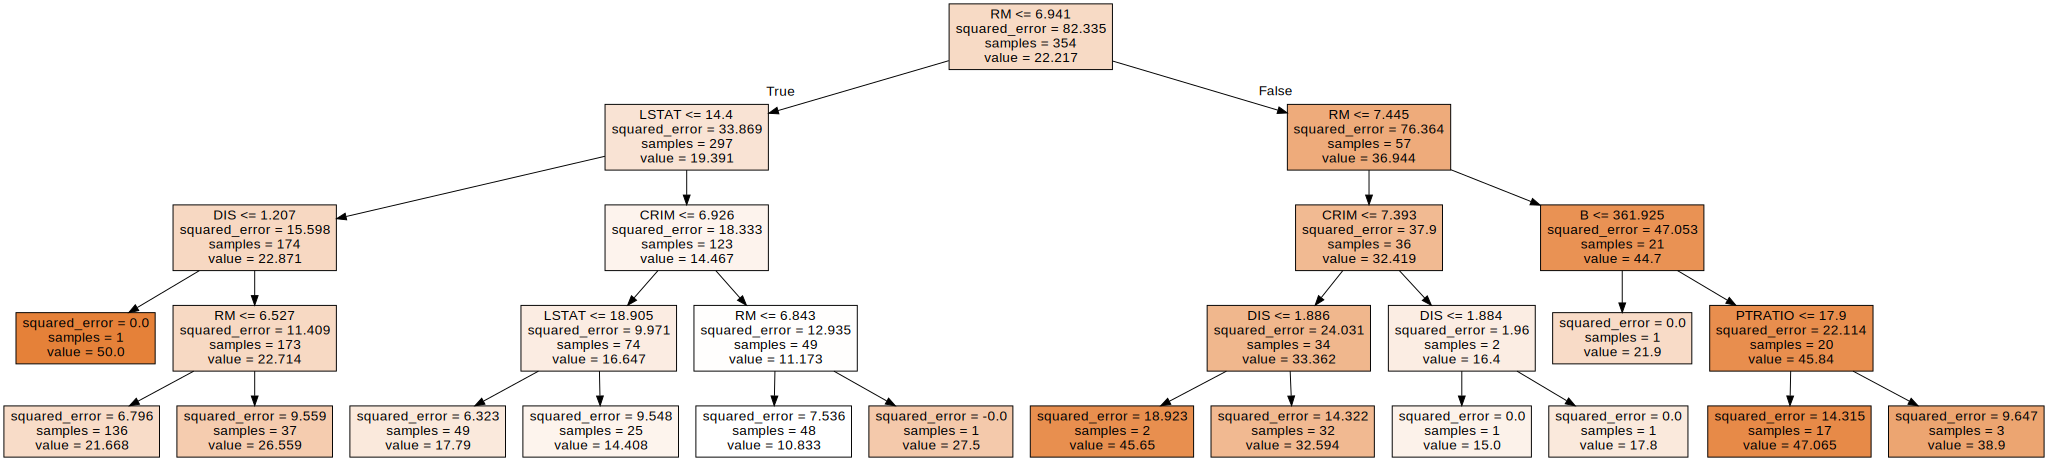

In [ ]:
tree = graphviz.Source(tree.export_graphviz(model, out_file=None, feature_names=boston.feature_names, filled = True))
tree